# ***Predição de preços - Carros***

Descrição do Projeto: Projeto utilizando metódos de Machine Learning para predição de preços de carros.

Dataset encontrado da internet (Kaggle).

Dicionário de Dados:

* *Car_name*: Nome do veículo.
* *Brand*: Marca do veículo.
* *Model*: Modelo do veículo.
* *Min_cost_price*: Preço mínimo do veículo.
* *Max_cost_price*: Preço máximo do veículo.
* *Vehicle_age*: Idade do veículo.
* *Km_driven*: Kilometragem rodada.
* *Seller_type*: Tipo de vendedor.
* *Fuel_type*: Tipo de combustível do veículo.
* *Transmission_type*: Tipo de câmbio.
* *Mileage*: Consumo de KM/L.
* *Engine*: Motor (Cilindradas).
* *Max_power*: Potência máxima do veículo (Brake horsepower, um tipo de cavalos de potência, mas que leva em conta a fricção).
* *Seats*: Número de assentos.
* *Selling_price*: Preço de venda (Rupias indianas).

## Importação de bibliotecas e tratamento de dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [2]:
# Carregando a base
carros = pd.read_csv('./data/dados_carros.csv')
carros.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
# Dropando a primeira coluna, que é irrelevante
carros = carros.drop(carros.columns[0], axis=1)
carros.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
# Configurando para que os números fiquem apenas com duas casas decimais, no máximo
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
carros.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
# Renomeando as colunas do inglês para português
carros.columns = ['nome', 
                  'marca', 
                  'modelo', 
                  'preco_minimo_custo', 
                  'preco_maximo_custo', 
                  'idade_veiculo', 
                  'kms_rodados', 
                  'tipo_vendedor', 
                  'tipo_combustivel',
                  'cambio',
                  'consumo',
                  'motor',
                  'potencia_maxima',
                  'assentos', 
                  'preco_venda']
carros.head()

,nome,marca,modelo,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,tipo_vendedor,tipo_combustivel,cambio,consumo,motor,potencia_maxima,assentos,preco_venda
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
# Fazendo a conversão de rupias indianas para real brasileiro (1 rupia ≅ 0.075 real na cotação atual)

carros[['preco_minimo_custo', 'preco_maximo_custo', 'preco_venda']] = carros[['preco_minimo_custo', 'preco_maximo_custo', 'preco_venda']] * 0.075
carros.head()

,nome,marca,modelo,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,tipo_vendedor,tipo_combustivel,cambio,consumo,motor,potencia_maxima,assentos,preco_venda
0,Maruti Alto,Maruti,Alto,26775.29,34905.12,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,9000.00
1,Hyundai Grand,Hyundai,Grand,53325.00,56100.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,41250.00
2,Hyundai i20,Hyundai,i20,64056.21,98094.42,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,16125.00
3,Maruti Alto,Maruti,Alto,26775.29,34905.12,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,16950.00
4,Ford Ecosport,Ford,Ecosport,76050.00,103425.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,42750.00


In [7]:
# Separando os tipos únicos de combustível
carros['tipo_combustivel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [8]:
# Renomear os tipos de combustível para o português
carros['tipo_combustivel'] = carros['tipo_combustivel'].map({'Petrol': 'Gasolina', 'Diesel': 'Diesel', 'CNG': 'GNV', 'LPG': 'GLP', 'Electric': 'Elétrico'})
carros['tipo_combustivel'].unique()

array(['Gasolina', 'Diesel', 'GNV', 'GLP', 'Elétrico'], dtype=object)

In [9]:
# Número de linhas e colunas
carros.shape

(15411, 15)

In [10]:
# Informações básicas das colunas e valores
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                15411 non-null  object 
 1   marca               15411 non-null  object 
 2   modelo              15411 non-null  object 
 3   preco_minimo_custo  15411 non-null  float64
 4   preco_maximo_custo  15411 non-null  float64
 5   idade_veiculo       15411 non-null  int64  
 6   kms_rodados         15411 non-null  int64  
 7   tipo_vendedor       15411 non-null  object 
 8   tipo_combustivel    15411 non-null  object 
 9   cambio              15411 non-null  object 
 10  consumo             15411 non-null  float64
 11  motor               15411 non-null  int64  
 12  potencia_maxima     15411 non-null  float64
 13  assentos            15411 non-null  int64  
 14  preco_venda         15411 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 1.8+

In [11]:
# Avaliando valores faltantes
carros.isnull().sum()

nome                  0
marca                 0
modelo                0
preco_minimo_custo    0
preco_maximo_custo    0
idade_veiculo         0
kms_rodados           0
tipo_vendedor         0
tipo_combustivel      0
cambio                0
consumo               0
motor                 0
potencia_maxima       0
assentos              0
preco_venda           0
dtype: int64

In [12]:
# Distribuição de variáveis categóricas
print(carros['tipo_combustivel'].value_counts())
print(carros['tipo_vendedor'].value_counts())
print(carros['cambio'].value_counts())
print(carros['marca'].value_counts())
print(carros['modelo'].value_counts())

Gasolina    7643
Diesel      7419
GNV          301
GLP           44
Elétrico       4
Name: tipo_combustivel, dtype: int64
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: tipo_vendedor, dtype: int64
Manual       12225
Automatic     3186
Name: cambio, dtype: int64
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
ISUZU               2
Maserati            2
Ferrari             1
Force               1
Mercedes-AMG        1
Rolls-Royce         1


## EDA

In [13]:
carros.describe()

,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,consumo,motor,potencia_maxima,assentos,preco_venda
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,441972.83,147196.79,6.04,55616.48,19.70,1486.06,100.59,5.33,58122.83
std,4252388.55,216722.67,3.01,51618.55,4.17,521.11,42.97,0.81,67059.63
min,23325.00,32700.00,0.00,100.00,4.00,793.00,38.40,0.00,3000.00
25%,50100.00,65465.00,4.00,30000.00,17.00,1197.00,74.00,5.00,28875.00
50%,64125.00,90450.00,6.00,50000.00,19.67,1248.00,88.50,5.00,41700.00
75%,96300.00,130725.00,8.00,70000.00,22.70,1582.00,117.30,5.00,61875.00
max,74100000.00,6832500.00,29.00,3800000.00,33.54,6592.00,626.00,9.00,2962500.00


<AxesSubplot:title={'center':'Preço de venda'}, xlabel='R$'>

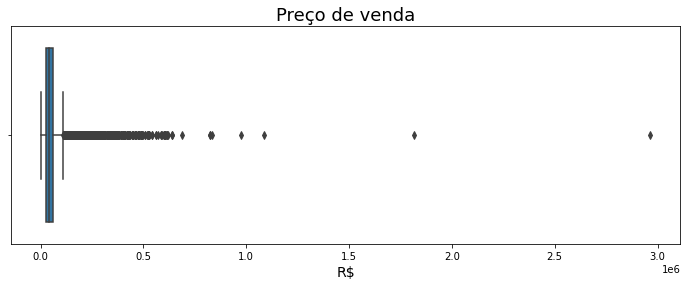

In [14]:
# Verificando outliers existentes
ax = sns.boxplot(x = 'preco_venda', data = carros, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Preço de venda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax

In [15]:
# Separando os quartis e os limites inferior e superior
valor = carros['preco_venda']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [16]:
# Separando os outliers
carros[np.logical_or(valor < limite_inferior, valor > limite_superior)]

,nome,marca,modelo,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,tipo_vendedor,tipo_combustivel,cambio,consumo,motor,potencia_maxima,assentos,preco_venda
12,Mini Cooper,Mini,Cooper,317910.00,392940.00,4,6000,Dealer,Gasolina,Automatic,14.41,1998,189.08,5,243750.00
58,Mahindra XUV500,Mahindra,XUV500,124050.00,174600.00,3,21500,Individual,Diesel,Automatic,15.10,2179,152.87,7,123750.00
111,BMW 5,BMW,5,558023.08,626423.08,5,63000,Dealer,Diesel,Automatic,18.59,2993,261.49,5,195000.00
129,Ford Endeavour,Ford,Endeavour,272025.00,320475.00,3,11387,Individual,Diesel,Automatic,10.91,3198,197.00,7,217500.00
139,BMW 3,BMW,3,384331.61,435888.84,5,68000,Dealer,Diesel,Automatic,22.69,1995,190.00,5,156750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15360,Jeep Compass,Jeep,Compass,174975.00,266175.00,3,70000,Individual,Diesel,Manual,16.30,1956,170.00,5,131250.00
15362,BMW 5,BMW,5,570300.00,639300.00,4,30000,Dealer,Diesel,Automatic,22.48,1995,187.74,5,298125.00
15384,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,565875.00,705075.00,3,25000,Dealer,Diesel,Automatic,10.00,2148,170.00,5,333750.00
15392,Land Rover Rover,Land Rover,Rover,539475.00,559200.00,5,128000,Dealer,Diesel,Automatic,12.63,2179,147.50,5,200625.00


In [17]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
carros_new = carros[selecao]
carros_new.shape[0] - carros.shape[0]

-1386

<AxesSubplot:title={'center':'Preço de venda'}, xlabel='R$'>

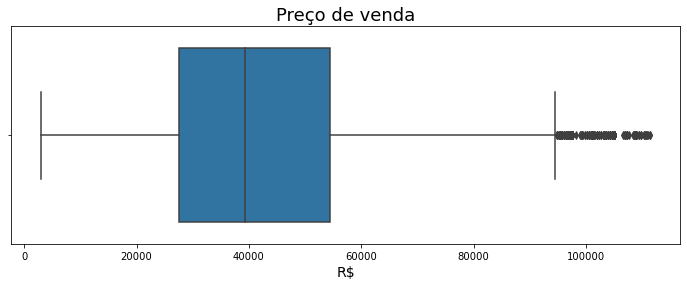

In [18]:
# Plotando o dataframe sem os outliers
ax = sns.boxplot(x = 'preco_venda', data = carros_new, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Preço de venda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax

In [19]:
carros_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14025 entries, 0 to 15410
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                14025 non-null  object 
 1   marca               14025 non-null  object 
 2   modelo              14025 non-null  object 
 3   preco_minimo_custo  14025 non-null  float64
 4   preco_maximo_custo  14025 non-null  float64
 5   idade_veiculo       14025 non-null  int64  
 6   kms_rodados         14025 non-null  int64  
 7   tipo_vendedor       14025 non-null  object 
 8   tipo_combustivel    14025 non-null  object 
 9   cambio              14025 non-null  object 
 10  consumo             14025 non-null  float64
 11  motor               14025 non-null  int64  
 12  potencia_maxima     14025 non-null  float64
 13  assentos            14025 non-null  int64  
 14  preco_venda         14025 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 1.7+

In [20]:
carros = carros_new
carros

,nome,marca,modelo,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,tipo_vendedor,tipo_combustivel,cambio,consumo,motor,potencia_maxima,assentos,preco_venda
0,Maruti Alto,Maruti,Alto,26775.29,34905.12,9,120000,Individual,Gasolina,Manual,19.70,796,46.30,5,9000.00
1,Hyundai Grand,Hyundai,Grand,53325.00,56100.00,5,20000,Individual,Gasolina,Manual,18.90,1197,82.00,5,41250.00
2,Hyundai i20,Hyundai,i20,64056.21,98094.42,11,60000,Individual,Gasolina,Manual,17.00,1197,80.00,5,16125.00
3,Maruti Alto,Maruti,Alto,26775.29,34905.12,9,37000,Individual,Gasolina,Manual,20.92,998,67.10,5,16950.00
4,Ford Ecosport,Ford,Ecosport,76050.00,103425.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,42750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,52374.00,54700.00,9,10723,Dealer,Gasolina,Manual,19.81,1086,68.05,5,18750.00
15407,Maruti Ertiga,Maruti,Ertiga,69508.20,86247.60,2,18000,Dealer,Gasolina,Manual,17.50,1373,91.10,7,69375.00
15408,Skoda Rapid,Skoda,Rapid,66947.45,117266.33,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,31875.00
15409,Mahindra XUV500,Mahindra,XUV500,133725.00,186825.00,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,91875.00


## Variáveis preditoras e variável target 

In [21]:
# As variáveis NOME e MODELO não terão muita relevância para o treino e teste, e a variável PRECO_VENDA é a variável target
X = carros.drop(['nome','modelo','preco_venda'], axis = 1)
Y = carros['preco_venda']

In [22]:
X

,marca,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,tipo_vendedor,tipo_combustivel,cambio,consumo,motor,potencia_maxima,assentos
0,Maruti,26775.29,34905.12,9,120000,Individual,Gasolina,Manual,19.70,796,46.30,5
1,Hyundai,53325.00,56100.00,5,20000,Individual,Gasolina,Manual,18.90,1197,82.00,5
2,Hyundai,64056.21,98094.42,11,60000,Individual,Gasolina,Manual,17.00,1197,80.00,5
3,Maruti,26775.29,34905.12,9,37000,Individual,Gasolina,Manual,20.92,998,67.10,5
4,Ford,76050.00,103425.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,52374.00,54700.00,9,10723,Dealer,Gasolina,Manual,19.81,1086,68.05,5
15407,Maruti,69508.20,86247.60,2,18000,Dealer,Gasolina,Manual,17.50,1373,91.10,7
15408,Skoda,66947.45,117266.33,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5
15409,Mahindra,133725.00,186825.00,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7


In [23]:
Y

0        9000.00
1       41250.00
2       16125.00
3       16950.00
4       42750.00
          ...   
15406   18750.00
15407   69375.00
15408   31875.00
15409   91875.00
15410   90000.00
Name: preco_venda, Length: 14025, dtype: float64

In [24]:
# Fazendo o split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 3)

## Codificando as variáveis categóricas

In [25]:
# Separando as colunas categóricas
colunas_categoricas = X_train.select_dtypes(object).columns
colunas_categoricas

Index(['marca', 'tipo_vendedor', 'tipo_combustivel', 'cambio'], dtype='object')

In [26]:
# Criando o objeto que transformará as colunas categóricas em numéricas (n-1 o número de classes utilizando o drop = 'first')
ohe = OneHotEncoder(sparse = False, drop = 'first')

In [27]:
X_train['tipo_combustivel']

572        Diesel
5740     Gasolina
3471       Diesel
13384      Diesel
8309       Diesel
           ...   
9944     Gasolina
10739    Gasolina
12608      Diesel
1838     Gasolina
6531     Gasolina
Name: tipo_combustivel, Length: 12622, dtype: object

In [28]:
# Utilizando o fit_transform do OneHotEnconder
ohe.fit_transform(X_train[['tipo_combustivel']])

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [29]:
# Observa-se que, por conta do tratamento de outliers, os carros a eletricidade foram retirados
ohe.categories_

[array(['Diesel', 'GLP', 'GNV', 'Gasolina'], dtype=object)]

In [30]:
# Transformando as variáveis categóricas em numéricas

for coluna_categorica in colunas_categoricas:
    colunas_ohe = ohe.fit_transform(X_train[[coluna_categorica]])
    colunas_ohe_teste = ohe.transform(X_test[[coluna_categorica]])
    
    
    categorias_ohe = ohe.categories_[0][1:]
    
    
    for indice, nome_categoria in enumerate(categorias_ohe):
        df_categorias = pd.DataFrame(data = colunas_ohe[:, indice], columns = [nome_categoria])
        df_categorias_teste = pd.DataFrame(data = colunas_ohe_teste[:, indice], columns = [nome_categoria])
        
        
        X_train[nome_categoria] = colunas_ohe[:, indice]
        X_test[nome_categoria] = colunas_ohe_teste[:, indice]
       
   
    X_train = X_train.drop(coluna_categorica, axis = 1)
    X_test = X_test.drop(coluna_categorica, axis = 1)

<ipython-input-30-96863d7ecf6d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[nome_categoria] = colunas_ohe[:, indice]
<ipython-input-30-96863d7ecf6d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[nome_categoria] = colunas_ohe_teste[:, indice]


In [31]:
X_train.head()

,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,consumo,motor,potencia_maxima,assentos,BMW,Datsun,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Individual,Trustmark Dealer,GLP,GNV,Gasolina,Manual
572,62975.00,99250.00,5,50000,24.30,1248,88.50,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
5740,27375.00,36450.00,12,110000,24.70,796,47.30,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00
3471,73422.30,100513.49,6,53698,28.09,1248,88.50,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
13384,66947.45,117266.33,3,62600,21.72,1498,108.60,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8309,47185.54,69015.20,7,89000,25.20,1248,74.00,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [32]:
carros.loc[carros.index == 572, 'marca'].values , carros.loc[carros.index == 13384, 'marca'].values

(array(['Maruti'], dtype=object), array(['Skoda'], dtype=object))

In [33]:
X_test.head()

,preco_minimo_custo,preco_maximo_custo,idade_veiculo,kms_rodados,consumo,motor,potencia_maxima,assentos,BMW,Datsun,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Individual,Trustmark Dealer,GLP,GNV,Gasolina,Manual
2286,47185.54,69015.20,10,225000,22.90,1248,74.00,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1848,40500.00,54000.00,10,48000,18.90,998,67.10,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
229,84900.00,119100.00,8,113000,22.32,1582,126.30,5,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
9747,44775.00,45300.00,8,64000,26.60,998,58.16,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
2377,26700.00,44925.00,5,25000,25.17,799,53.30,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00


## Treinando os modelos (Regressão Linear e Random Forest)

#### Regressão Linear

In [34]:
# Criando objeto de regressão linear
mdl_regressao_linear = LinearRegression()

In [35]:
mdl_regressao_linear.fit(X_train, y_train)

LinearRegression()

Validação do modelo com cross validation

In [36]:
# Validação cruzada com r2
scores_regressao_linear = cross_val_score(mdl_regressao_linear, X_train, y_train, scoring = 'r2', cv = 5)
scores_regressao_linear

array([0.76971005, 0.7853648 , 0.78302421, 0.77068331, 0.75498808])

In [37]:
scores_regressao_linear.mean()

0.7727540877228394

#### Random Forest

In [38]:
# Criando objeto de random forest
mdl_random_forest = RandomForestClassifier()

In [39]:
mdl_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
# R2
scores_rf = cross_val_score(mdl_random_forest, X_train, y_train, scoring = 'r2', cv = 5)
scores_rf

E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([0.82846278, 0.84597156, 0.84237812, 0.84233845, 0.83697834])

In [41]:
scores_rf.mean()

0.8392258482740242

## Testagem

In [42]:
# Predições na base de teste (Random Forest)
predicoes = mdl_random_forest.predict(X_test)

In [43]:
r2score = r2_score(y_test, predicoes)
print("R2 Score: ", r2score)

R2 Score:  0.8565780458247807


In [44]:
# Predições na base de teste (Regressão Linear)
predicoes1 = mdl_regressao_linear.predict(X_test)

In [45]:
r2score1 = r2_score(y_test, predicoes1)
print("R2 Score: ", r2score1)

R2 Score:  0.7887436516326833


## Exportando modelos para utilizar em aplicação

In [46]:
import joblib

with open('./models/rf_model.pkl', 'wb') as arquivo_modelo:
    joblib.dump(mdl_random_forest, arquivo_modelo, compress = 3)

In [47]:
with open('./models/linear_model.pkl', 'wb') as arquivo_modelo:
    joblib.dump(mdl_regressao_linear, arquivo_modelo, compress=3)

In [48]:
# Exportando base de dados com parquet para utilizar na aplicação
carros.to_parquet('./data/carros.parquet')

# ***Fim***